In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Template1.xlsx',sheet_name = None)

In [3]:
xls = pd.ExcelFile('Template1.xlsx')
xls.sheet_names 
flow = data.get('Flow vs. Group')
flow.head()

,SN,Flow,Step Name,WS,Area,Step SEQ NO,STEP STATUS,REC TO SCHED?,EXPORT TO CRINV?
0,1,100S PC,5450-21 STI OXIDE BACKSIDE WET ETCH,11-3DNS_SU31_DHF100,F11 WET PROCESS,100,ACTIVE,Y,Y
1,1,100S PC,5450-21 STI OXIDE BACKSIDE WET ETCH,11-3DNS_SU3_DHF100,F11 WET PROCESS,100,ACTIVE,Y,N
2,1,100S PC,5450-21 STI OXIDE BACKSIDE WET ETCH,11-3DNS_SU31_DHF_4,F11 WET PROCESS,100,ACTIVE,Y,N
3,2,100S PC,5200-53 GATE NITRIDE DEP 2 CMP,11-3EBRA_FRXX_BUFF,F11 CMP,200,ACTIVE,Y,N
4,2,100S PC,5200-53 GATE NITRIDE DEP 2 CMP,11-3EBRA_FRXS_BUFF,F11 CMP,200,ACTIVE,Y,Y


In [4]:
flow = flow[flow['Flow'] == '120S PC']

In [5]:
Qty = data.get('WS vs. Tool ID') 
WS_NAME = Qty['WS']
WS_NAME1 = []
for i in WS_NAME:
    #i.replace('\\xa0', '')
    WS_NAME1.append(i.replace('\xa0', ''))
print(len(WS_NAME1))

3780


In [6]:
G_WS = data.get('Group vs. WS')
G_WS1 = G_WS.set_index(['Capacity Group'],inplace = False)
WS_Group = []
for i in WS_NAME1:
    if i in G_WS1['WS'].tolist():
        group = G_WS1[G_WS1['WS'] ==  i].index.tolist()
    else:
        group = ['0']
    #group = G_WS[G_WS['WS'] ==  i].iat[0,0]
    WS_Group.extend(group)
    #print(group)
Qty['WS Group'] = WS_Group
Qty['WS'] = WS_NAME1
Qty.head()

,MiCAP ID,WS,Tool ID,Location,WS Group
0,1195118,11-3HIKE_Q2LV_UDPLY,KISDB7VA00,7,11-DIF_UDPLY
1,1195119,11-3HIKE_Q2LV_BSIGE,KISDB7V300,7,11-DIF_BSIGEPLY
2,1195249,11-3TEL_SDRM_EBK,TTSDBC0130,C,11-DRY_SDRM_EBK
3,1195249,11-3TEL_SDRM_EBK,TTSDBC0120,C,11-DRY_SDRM_EBK
4,1195249,11-3TEL_SDRM_EBK,TTSDBC0110,C,11-DRY_SDRM_EBK


In [7]:
step = []
for i in flow['WS']:
    if i in G_WS1['WS'].tolist():
        s = G_WS1[G_WS1['WS'] ==  i].index.tolist()
    else:
        s = ['0']
    step.extend(s)
#print(step[:10])

In [8]:
flow = flow.drop(['Area','Step SEQ NO','STEP STATUS','REC TO SCHED?','EXPORT TO CRINV?'], axis = 1)
#flow['WS Group'] = step
flow.set_index(['SN'],inplace = True)
flow.head()

,Flow,Step Name,WS
SN,,,
1,120S PC,5420-88 PASS NITRIDE DRY ETCH SCRUB,11-3TEL_NS3S_SCRB_DS
1,120S PC,5420-88 PASS NITRIDE DRY ETCH SCRUB,11-3DNS_SS33_SCRB_DS
1,120S PC,5420-88 PASS NITRIDE DRY ETCH SCRUB,11-3DNS_SS32_SCRB_DS
2,120S PC,5420-5C SPACER OXIDE DRY STRIP 2 SCRUB,11-3TEL_NS3S_SCRB_DS
2,120S PC,5420-5C SPACER OXIDE DRY STRIP 2 SCRUB,11-3DNS_SS32_SCRB_DS


In [9]:
wafer = input('Please enter the quantity of wafers:')

Please enter the quantity of wafers:7000


In [10]:
step1 = flow[flow['WS'] == '11-3PSK_SVP_F_STR_IM'].index.tolist()
step2 = flow[flow['WS'] == '11-3PSK_SVP_F_STR_NI'].index.tolist()
step1.extend(step2)
b = [i-1 for i in step1]
c = [i+1 for i in step1]
step1.extend(b)
step1.extend(c)
step1.sort()
print(step1)
#print(flow.loc[75,'WS'].tolist())

[74, 75, 76, 82, 83, 84, 98, 99, 100, 120, 121, 122, 128, 129, 130, 141, 142, 143, 145, 146, 147, 149, 150, 151, 153, 154, 155, 157, 158, 159, 163, 164, 165, 170, 171, 172, 181, 182, 183, 197, 198, 199, 214, 215, 216, 228, 229, 230, 233, 234, 235, 237, 238, 239, 244, 245, 246, 251, 252, 253, 256, 257, 258, 262, 263, 264, 268, 269, 270, 275, 276, 277, 284, 285, 286, 289, 290, 291, 292, 293, 294, 297, 298, 299, 303, 304, 305, 333, 334, 335, 341, 342, 343, 348, 349, 350, 373, 374, 375, 379, 380, 381, 386, 387, 388, 388, 389, 390, 392, 393, 394, 395, 396, 397, 399, 400, 401, 411, 412, 413, 416, 417, 418, 427, 428, 429, 432, 433, 434, 454, 455, 456, 464, 465, 466, 469, 470, 471, 480, 481, 482, 485, 486, 487, 501, 502, 503, 514, 515, 516, 570, 571, 572, 577, 578, 579, 585, 586, 587, 588, 589, 590, 623, 624, 625, 628, 629, 630, 645, 646, 647, 650, 651, 652, 660, 661, 662, 705, 706, 707, 709, 710, 711]


In [11]:
col = ['3','4','7','8','9','C','D','E']
machine_num = pd.DataFrame(columns = col)
for i in step1: #資料取出後型態不同
    if type(flow.loc[i,'WS']) == str:
        sn = [flow.loc[i,'WS']]
    else:
        sn = flow.loc[i,'WS'].tolist()
    machine_D = np.zeros((1,8))
    for j in sn:
        f1 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '3')].shape[0]
        f2 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '4')].shape[0]
        f3 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '7')].shape[0]
        f4 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '8')].shape[0]
        f5 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '9')].shape[0]
        f6 = Qty[(Qty['WS'] == j) & (Qty['Location'] == 'C')].shape[0]
        f7 = Qty[(Qty['WS'] == j) & (Qty['Location'] == 'D')].shape[0]
        f8 = Qty[(Qty['WS'] == j) & (Qty['Location'] == 'E')].shape[0]
        machine = np.array([f1,f2,f3,f4,f5,f6,f7,f8])
        machine_D = machine + machine_D
    machine_D = pd.DataFrame(machine_D,columns = col)
    machine_num = machine_num.append(machine_D)
machine_num.head()



,3,4,7,8,9,C,D,E
0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
0,10.0,3.0,19.0,0.0,12.0,12.0,4.0,3.0
0,11.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0
0,5.0,13.0,0.0,0.0,14.0,0.0,1.0,16.0
0,10.0,3.0,19.0,0.0,12.0,12.0,4.0,3.0


In [12]:
for k in range(len(step1)):
    a = round(int(wafer)//sum(machine_num.values[k]),2)
    for h in range(8):
        machine_num.values[k,h] = a*machine_num.values[k,h]
#print(machine_num.values)
wafer_in_each_fab = pd.DataFrame(machine_num.values,columns = col)
wafer_in_each_fab.head()

C:\Program Files\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,3,4,7,8,9,C,D,E
0,0.0,0.0,3500.0,0.0,0.0,3500.0,0.0,0.0
1,1110.0,333.0,2109.0,0.0,1332.0,1332.0,444.0,333.0
2,3663.0,0.0,666.0,0.0,0.0,2664.0,0.0,0.0
3,710.0,1846.0,0.0,0.0,1988.0,0.0,142.0,2272.0
4,1110.0,333.0,2109.0,0.0,1332.0,1332.0,444.0,333.0


In [13]:
data = np.vsplit(wafer_in_each_fab.values, len(step1)/3)

In [14]:
def weight(distance,carry):
    total_carry = []
    for i in range(2):
        carry_weight = np.multiply(carry[i],distance)
        total_carry_step = np.sum(carry_weight)-np.trace(carry_weight) 
        total_carry.append(total_carry_step)
        #print(carry_weight)
        #print(total_carry)
    return sum(total_carry)
weight_distance = np.array([[0,1,1,2,3,1,2,3],[1,0,2,3,4,2,3,4],[1,2,0,1,2,1,2,3],[2,3,1,0,1,2,3,4]
                           ,[3,4,2,1,0,3,4,5],[1,2,1,2,3,0,1,2],[2,3,2,3,4,1,0,1],[3,4,3,4,5,2,1,0]])
Carriage = []
for l in range(61):
    a = range(len(col))
    c_m = []
    for k in range(2):
        for j in a:
            for i in a:
                c_n = max(data[l][k,j]-data[l][k+1,j],0)*data[l][k+1,a]//(int(wafer)-data[l][k+1,j]+1) #避免分母為零
            c_m.append(c_n)      
    c_step_m = np.array(c_m)
    #print(c_step_m)
    #print(c_step_m.shape)
    c_carry = np.vsplit(c_step_m, 2)
    for i in range(2):
        for j in range(8):
            c_carry[i][j][j] = min(data[l][i,j],data[l][i+1,j])
            c_carry = np.array(c_carry)
    Carriage.append(weight(distance = weight_distance,carry = c_carry))
Carriage = np.array([Carriage]).reshape(61,1)
Carriage = pd.DataFrame(Carriage,columns = ['Relocation Carriage'])
Carriage.loc['Total Carriage'] = Carriage.apply(lambda x: x.sum())
Carriage.head()

C:\Program Files\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in floor_divide


,Relocation Carriage
0,12974.0
1,18452.0
2,16809.0
3,18651.0
4,15099.0


In [15]:
micap = [1351160,1351165,1351166,1351167,1351170,1351174]
c_loc = ['E','E','E','8','8','8','8','8','8','8','8','8','8','8','8','8','8','8']
change = pd.DataFrame()
for i in micap :
    change = pd.concat([change,Qty[Qty['MiCAP ID'] == i]],axis = 0)
print(change.index.tolist())
print(len(c_loc))

[3562, 3563, 3564, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3589, 3590, 3591, 3598, 3599, 3600]
18


In [16]:
for i in range(len(c_loc)):
    Qty.loc[change.index.tolist()[i],'Location'] = c_loc[i]
#print(Qty.loc[3577,'Location'])
print(Qty.iloc[3562:3601,:])

      MiCAP ID                    WS     Tool ID Location  \
3562   1351160  11-3PSK_SVP_F_STR_NI  WPSKB7AT10        E   
3563   1351160  11-3PSK_SVP_F_STR_NI  WPSKB7AT20        E   
3564   1351160  11-3PSK_SVP_F_STR_NI  WPSKB7AT30        E   
3565   1351161  11-3PSK_SVP_F_STR_NI  WPSKB8AR10        8   
3566   1351161  11-3PSK_SVP_F_STR_NI  WPSKB8AR20        8   
3567   1351161  11-3PSK_SVP_F_STR_NI  WPSKB8AR30        8   
3568   1351162  11-3PSK_SVP_F_STR_NI  WPSKB8AS10        8   
3569   1351162  11-3PSK_SVP_F_STR_NI  WPSKB8AS20        8   
3570   1351162  11-3PSK_SVP_F_STR_NI  WPSKB8AS30        8   
3571   1351164  11-3PSK_SVP_F_STR_NI  WPSKB8AT10        8   
3572   1351164  11-3PSK_SVP_F_STR_NI  WPSKB8AT20        8   
3573   1351164  11-3PSK_SVP_F_STR_NI  WPSKB8AT30        8   
3574   1351165  11-3PSK_SVP_F_STR_IM  WPSKB7AS10        8   
3575   1351165  11-3PSK_SVP_F_STR_IM  WPSKB7AS20        8   
3576   1351165  11-3PSK_SVP_F_STR_IM  WPSKB7AS30        8   
3577   1351166  11-3PSK_

In [17]:
machine_num1 = pd.DataFrame(columns = col)
for i in step1: #資料取出後型態不同
    if type(flow.loc[i,'WS']) == str:
        sn = [flow.loc[i,'WS']]
    else:
        sn = flow.loc[i,'WS'].tolist()
    machine_D = np.zeros((1,8))
    for j in sn:
        f1 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '3')].shape[0]
        f2 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '4')].shape[0]
        f3 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '7')].shape[0]
        f4 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '8')].shape[0]
        f5 = Qty[(Qty['WS'] == j) & (Qty['Location'] == '9')].shape[0]
        f6 = Qty[(Qty['WS'] == j) & (Qty['Location'] == 'C')].shape[0]
        f7 = Qty[(Qty['WS'] == j) & (Qty['Location'] == 'D')].shape[0]
        f8 = Qty[(Qty['WS'] == j) & (Qty['Location'] == 'E')].shape[0]
        machine = np.array([f1,f2,f3,f4,f5,f6,f7,f8])
        machine_D = machine + machine_D
    machine_D = pd.DataFrame(machine_D,columns = col)
    machine_num1 = machine_num1.append(machine_D)
machine_num1.head(183)

,3,4,7,8,9,C,D,E
0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
0,10.0,3.0,16.0,9.0,12.0,6.0,4.0,3.0
0,11.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0
0,5.0,13.0,0.0,0.0,14.0,0.0,1.0,16.0
0,10.0,3.0,16.0,9.0,12.0,6.0,4.0,3.0
0,11.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0
0,0.0,0.0,12.0,18.0,0.0,5.0,0.0,0.0
0,2.0,3.0,0.0,39.0,17.0,2.0,3.0,7.0
0,11.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
for k in range(len(step1)):
    a = round(int(wafer)//sum(machine_num1.values[k]),2)
    for h in range(8):
        machine_num1.values[k,h] = a*machine_num1.values[k,h]
#print(machine_num.values)
wafer_in_each_fab1 = pd.DataFrame(machine_num1.values,columns = col)
wafer_in_each_fab1.head()

C:\Program Files\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,3,4,7,8,9,C,D,E
0,0.0,0.0,3500.0,0.0,0.0,3500.0,0.0,0.0
1,1110.0,333.0,1776.0,999.0,1332.0,666.0,444.0,333.0
2,3663.0,0.0,666.0,0.0,0.0,2664.0,0.0,0.0
3,710.0,1846.0,0.0,0.0,1988.0,0.0,142.0,2272.0
4,1110.0,333.0,1776.0,999.0,1332.0,666.0,444.0,333.0


In [19]:
data1 = np.vsplit(wafer_in_each_fab1.values, len(step1)/3)

In [20]:
Carriage1 = []
for l in range(61):
    a = range(len(col))
    c_m = []
    for k in range(2):
        for j in a:
            for i in a:
                c_n = max(data1[l][k,j]-data1[l][k+1,j],0)*data1[l][k+1,a]//(int(wafer)-data1[l][k+1,j]+1) #避免分母為零
            c_m.append(c_n)      
    c_step_m = np.array(c_m)
    #print(c_step_m)
    #print(c_step_m.shape)
    c_carry = np.vsplit(c_step_m, 2)
    for i in range(2):
        for j in range(8):
            c_carry[i][j][j] = min(data[l][i,j],data[l][i+1,j])
            c_carry = np.array(c_carry)
    Carriage1.append(weight(distance = weight_distance,carry = c_carry))
Carriage1 = np.array([Carriage1]).reshape(61,1)
Carriage1 = pd.DataFrame(Carriage1,columns = ['Original Carriage'])
Carriage1.loc['Total Carriage'] = Carriage1.apply(lambda x: x.sum())
#Carriage1.head(62)


C:\Program Files\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in floor_divide
  


In [21]:
pd.concat([Carriage1,Carriage],axis = 1)

,Original Carriage,Relocation Carriage
0,16321.0,12974.0
1,20466.0,18452.0
2,19625.0,16809.0
3,20455.0,18651.0
4,17169.0,15099.0
5,21243.0,19261.0
6,11435.0,10314.0
7,11435.0,10314.0
8,11435.0,10314.0
9,11435.0,10314.0


Text(0.5, 0, 'Step')

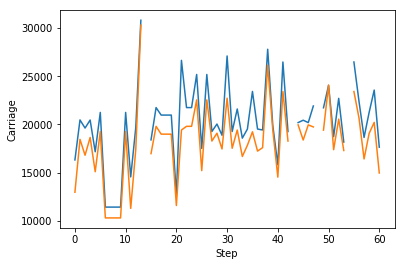

In [30]:
plt.plot(range(61),Carriage1[:-1],range(61),Carriage[:-1])
plt.ylabel('Carriage')
plt.xlabel('Step')